In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
## 주가 분석 (수정)-현수님예전코드

import pandas as pd

csv = ['naver_fins_088260(이리츠코크랩).csv',
      'naver_fins_140910(에이리츠).csv',
      'naver_fins_145270(케이탑리츠).csv',
      'naver_fins_204210(모두투어리츠).csv',
      'naver_fins_293940(신한알파리츠).csv',
      'naver_fins_330590(롯데리츠).csv',
      'naver_fins_338100(NH프라임리츠).csv']

dfs = []

for i in range(7):
    temp = pd.read_csv(csv[i], header=0, index_col = 'date')
    
    ## object -> int
    temp["price"] = temp["price"].apply(lambda x: str(x.replace(',','')))
    temp["amt"] = temp["amt"].apply(lambda x: str(x.replace(',','')))
    temp = temp.astype({'price': 'int', 'amt': 'int'})
    
    ## 가격변동량, 가격변동률(%) 칼럼 추가
    temp['price_diff'] = (temp.price - temp.price.shift(-1)).fillna(0)
    temp['price_change'] = ((temp.price - temp.price.shift(-1)) /temp.price.shift(-1) *100).fillna(0)
    pd.options.display.float_format = '{:.2f}'.format  # 소수점 표기 옵션 변경(소수점 2째 자리까지)
    #temp['date_new'] = pd.to_datetime(dfs.index, format= '%Y.%m.%d')
    
    dfs.append(temp)

dfs    # 개별로 보고 싶으면 0~6 사이의 숫자 입력
dfs[0]

,price,amt,price_diff,price_change
date,,,,
2020.12.30,5410,51461,-10.00,-0.18
2020.12.29,5420,56016,-120.00,-2.17
2020.12.28,5540,111139,-20.00,-0.36
2020.12.24,5560,76904,80.00,1.46
2020.12.23,5480,28370,0.00,0.00
...,...,...,...,...
2020.01.08,6540,120701,-20.00,-0.30
2020.01.07,6560,65422,-80.00,-1.20
2020.01.06,6640,86859,-90.00,-1.34


In [4]:
#이거도 현수님예전 코드
new_df = dfs[0] + dfs[1] + dfs[2] + dfs[3] + dfs[4] + dfs[5] + dfs[6]

## 가격변동량, 가격변화율은 개별의 합과는 차이가 발생할 수 있으므로 싹 다 수정
new_df['price_diff'] = (new_df.price - new_df.price.shift(-1)).fillna(0)
new_df['price_change'] = ((new_df.price - new_df.price.shift(-1)) /new_df.price.shift(-1) *100).fillna(0)

pd.options.display.float_format = '{:.2f}'.format  # 소수점 표기 옵션 변경(소수점 2째 자리까지)
    
new_df['price_updown'] = new_df['price_change'].apply(lambda x: 
                                                  'up' if x>2
                                                   else 'same' if x > -2
                                                   else 'down')

new_df

,price,amt,price_diff,price_change,price_updown
date,,,,,
2020.12.30,33115,1228001,-85.00,-0.26,same
2020.12.29,33200,1280573,-1800.00,-5.14,down
2020.12.28,35000,1738166,-195.00,-0.55,same
2020.12.24,35195,2632590,260.00,0.74,same
2020.12.23,34935,1234793,-265.00,-0.75,same
...,...,...,...,...,...
2020.01.08,36006,2413801,-423.00,-1.16,same
2020.01.07,36429,1402186,-176.00,-0.48,same
2020.01.06,36605,2173719,-550.00,-1.48,same


In [5]:
#date가 컬럼으로 가게만들기
new_df = new_df.rename_axis('date').reset_index()
new_df

,date,price,amt,price_diff,price_change,price_updown
0,2020.12.30,33115,1228001,-85.00,-0.26,same
1,2020.12.29,33200,1280573,-1800.00,-5.14,down
2,2020.12.28,35000,1738166,-195.00,-0.55,same
3,2020.12.24,35195,2632590,260.00,0.74,same
4,2020.12.23,34935,1234793,-265.00,-0.75,same
...,...,...,...,...,...,...
243,2020.01.08,36006,2413801,-423.00,-1.16,same
244,2020.01.07,36429,1402186,-176.00,-0.48,same
245,2020.01.06,36605,2173719,-550.00,-1.48,same
246,2020.01.03,37155,1522159,-176.00,-0.47,same


In [6]:
#date의 데이터타입바꿔주기
new_df = new_df.astype({'date':'datetime64[ns]'})
new_df

,date,price,amt,price_diff,price_change,price_updown
0,2020-12-30,33115,1228001,-85.00,-0.26,same
1,2020-12-29,33200,1280573,-1800.00,-5.14,down
2,2020-12-28,35000,1738166,-195.00,-0.55,same
3,2020-12-24,35195,2632590,260.00,0.74,same
4,2020-12-23,34935,1234793,-265.00,-0.75,same
...,...,...,...,...,...,...
243,2020-01-08,36006,2413801,-423.00,-1.16,same
244,2020-01-07,36429,1402186,-176.00,-0.48,same
245,2020-01-06,36605,2173719,-550.00,-1.48,same
246,2020-01-03,37155,1522159,-176.00,-0.47,same


In [7]:
import datetime
import matplotlib

In [8]:
plt.rc('font',family='Malgun Gothic')

In [ ]:
#월별가격
.plot(x="date",y="price")
plt.gca().xaxis.set_major_locator(matplotlib.dates.MonthLocator()) 
plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y-%m"))
plt.gcf().autofmt_xdate()
plt.figure(figsize=(10,7))
plt.show()

In [ ]:
#월별 거래량
new_df.plot(x="date",y="amt")
plt.gca().xaxis.set_major_locator(matplotlib.dates.MonthLocator()) 
plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y-%m"))
plt.gcf().autofmt_xdate()
plt.figure(figsize=(10,7))
plt.show()

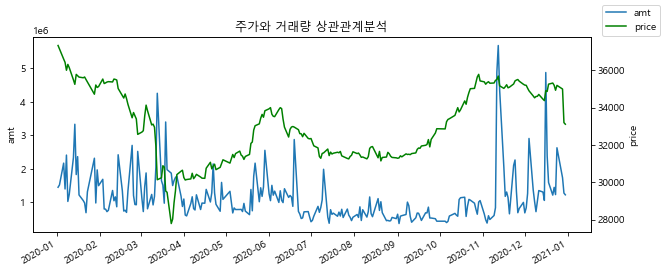

<Figure size 720x1008 with 0 Axes>

In [81]:
#주식가격과 거래량 상관관계분석
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(new_df["date"],new_df["amt"], label='amt')

ax1.set_ylabel('amt')
ax2 = ax1.twinx()
ax2.plot(new_df["date"],new_df["price"], color='green', label='price')
ax2.set_ylabel('price')
fig.legend(loc="upper right")

#짝수월도나오게 코딩
plt.gca().xaxis.set_major_locator(matplotlib.dates.MonthLocator())
plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y-%m"))
plt.gcf().autofmt_xdate()
plt.title('주가와 거래량 상관관계분석')
fig = plt.figure(figsize=(10,14))
plt.show()

In [ ]:
#그래프3개합치려면
#ax3 = ax1.twinx()
#ax1.bar(new_df3["date"],new_df3["amt"], color='red')

#plt.show()

In [10]:
# 거래량이 가장 높은 데이터 10개
new_df3=new_df.sort_values(by=['amt'], axis = 0, ascending=True).iloc[238:]
new_df3

,date,price,amt,price_diff,price_change,price_updown
212,2020-02-24,33460,2703512,-722.00,-2.11,down
132,2020-06-19,32961,2878485,-31.00,-0.09,same
17,2020-12-04,34905,2910301,-140.00,-0.40,same
239,2020-01-14,35252,3334474,-239.00,-0.67,same
194,2020-03-19,29540,3402131,-1278.00,-4.15,down
198,2020-03-13,30140,4259132,-1801.00,-5.64,down
32,2020-11-13,35170,4353288,-525.00,-1.47,same
9,2020-12-16,34910,4878990,530.00,1.54,same
34,2020-11-11,35505,4890629,42.00,0.12,same
33,2020-11-12,35695,5685100,190.00,0.54,same


In [11]:
#x축에 년,월,일만나오게바꿔준다.
new_df3['date'] = new_df3['date'].dt.date

Text(0, 0.5, '거래량(단위:일백만)')

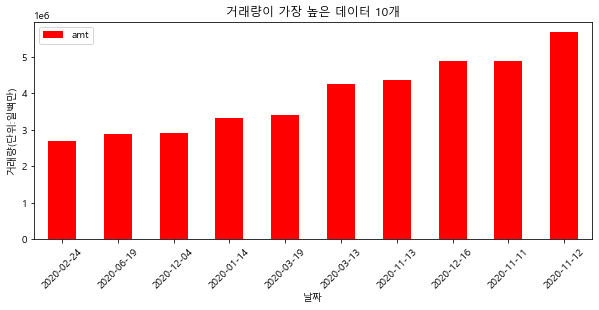

In [12]:
new_df3.plot.bar(x='date',y='amt',color='red',rot=45, figsize=(10,4))
plt.title('거래량이 가장 높은 데이터 10개')
plt.xlabel('날짜')
plt.ylabel('거래량(단위:일백만)')

In [13]:
## 양(+)의 가격변화율이 가장 높은 데이터 5개
new_df1=new_df.sort_values(by=("price_change"), axis = 0, ascending=False).iloc[0:5]
new_df1['date'] = new_df1['date'].dt.date
new_df1

,date,price,amt,price_diff,price_change,price_updown
190,2020-03-25,28912,1652775,876.00,3.12,up
188,2020-03-27,30415,1785610,875.00,2.96,up
205,2020-03-04,33552,1473186,784.00,2.39,up
189,2020-03-26,29540,1744548,628.00,2.17,up
196,2020-03-17,30890,1514025,641.00,2.12,up


Text(0, 0.5, '가격변화율')

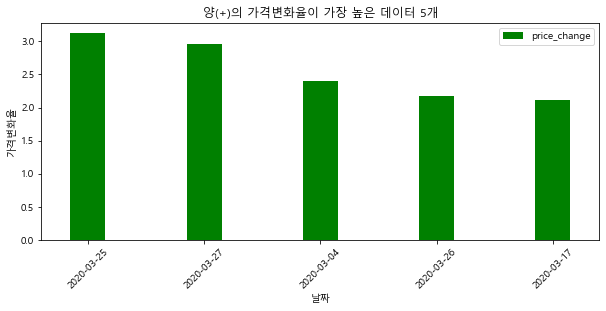

In [14]:
new_df1.plot.bar(x='date',y='price_change',color='green',rot=45, figsize=(10,4),width=0.3)
plt.title('양(+)의 가격변화율이 가장 높은 데이터 5개')
plt.xlabel('날짜')
plt.ylabel('가격변화율')

In [15]:
## 음(-)의 가격변화율이 가장 높은 데이터 5개
new_df2=new_df.sort_values(by=("price_change"), axis = 0, ascending=True).iloc[0:5]
new_df2['date'] = new_df2['date'].dt.date
new_df2

,date,price,amt,price_diff,price_change,price_updown
192,2020-03-23,27795,1874198,-1674.00,-5.68,down
198,2020-03-13,30140,4259132,-1801.00,-5.64,down
1,2020-12-29,33200,1280573,-1800.00,-5.14,down
194,2020-03-19,29540,3402131,-1278.00,-4.15,down
199,2020-03-12,31941,2059684,-1012.00,-3.07,down


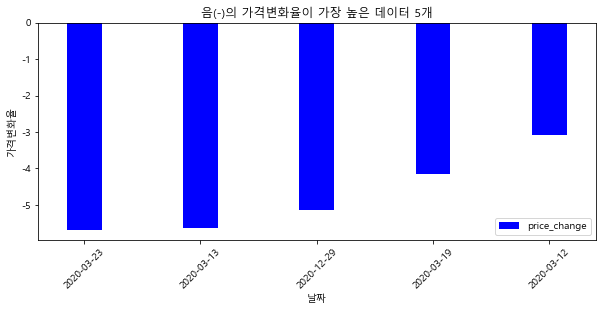

In [16]:
new_df2.plot.bar(x='date',y='price_change',color='blue',rot=45, figsize=(10,4),width=0.3)
plt.title('음(-)의 가격변화율이 가장 높은 데이터 5개')
plt.xlabel('날짜')
plt.ylabel('가격변화율')
plt.rcParams['axes.unicode_minus'] = False  

In [ ]:
#fig, ax = plt.subplots( figsize=(10,7))
#sns.barplot(data=new_df3, x="date", y="amt")
#ax.set(ylim=(200000,6000000))
#ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

In [ ]:
#ax3 = ax1.twinx()
#ax1.bar(new_df["date"],new_df["amt"], color='red')
#plt.show()

In [29]:
#매일경제가져오기
df = pd.read_csv('MK_count.csv')
df

,d,count,count_keywords,percentage
0,2020.01.01,300,4,1.33
1,2020.01.02,850,8,0.94
2,2020.01.03,650,7,1.08
3,2020.01.04,200,1,0.50
4,2020.01.05,350,6,1.71
...,...,...,...,...
361,2020.12.27,250,14,5.60
362,2020.12.28,650,8,1.23
363,2020.12.29,700,15,2.14
364,2020.12.30,750,13,1.73


In [30]:
#object형식의 dtype을 datetime으로 바꿔준다.
df = df.astype({'d':'datetime64[ns]'}) 
df

,d,count,count_keywords,percentage
0,2020-01-01,300,4,1.33
1,2020-01-02,850,8,0.94
2,2020-01-03,650,7,1.08
3,2020-01-04,200,1,0.50
4,2020-01-05,350,6,1.71
...,...,...,...,...
361,2020-12-27,250,14,5.60
362,2020-12-28,650,8,1.23
363,2020-12-29,700,15,2.14
364,2020-12-30,750,13,1.73


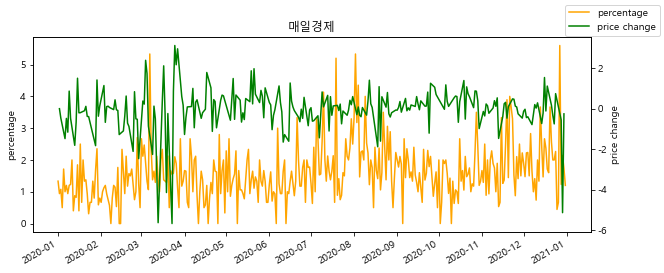

<Figure size 720x288 with 0 Axes>

In [82]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(df["d"],df["percentage"],color='orange', label='percentage')

ax1.set_ylabel('percentage')
ax2 = ax1.twinx()
ax2.plot(new_df["date"],new_df["price_diff"], color='green', label='price diff')
ax2.set_ylabel('price diff')
fig.legend(loc="upper right")

#짝수월도나오게 코딩
plt.gca().xaxis.set_major_locator(matplotlib.dates.MonthLocator())
plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y-%m"))
plt.gcf().autofmt_xdate()
plt.title('매일경제')
fig = plt.figure(figsize=(10,4))
#fig = plt.figure(figsize=(4,4))
#plt.rcParams['figure.figsize'] = [10, 4]
plt.show()

In [19]:
#한국경제가져오기
df1 = pd.read_csv('HK_count2.csv')
df1

,d,count,count_keywords,percentage
0,2020.01.01,350,2,0.57
1,2020.01.02,750,6,0.80
2,2020.01.03,600,1,0.17
3,2020.01.04,250,0,0.00
4,2020.01.05,300,1,0.33
...,...,...,...,...
361,2020.12.27,250,18,7.20
362,2020.12.28,750,24,3.20
363,2020.12.29,800,18,2.25
364,2020.12.30,750,13,1.73


In [20]:
df1 = df1.astype({'d':'datetime64[ns]'})
df1

,d,count,count_keywords,percentage
0,2020-01-01,350,2,0.57
1,2020-01-02,750,6,0.80
2,2020-01-03,600,1,0.17
3,2020-01-04,250,0,0.00
4,2020-01-05,300,1,0.33
...,...,...,...,...
361,2020-12-27,250,18,7.20
362,2020-12-28,750,24,3.20
363,2020-12-29,800,18,2.25
364,2020-12-30,750,13,1.73


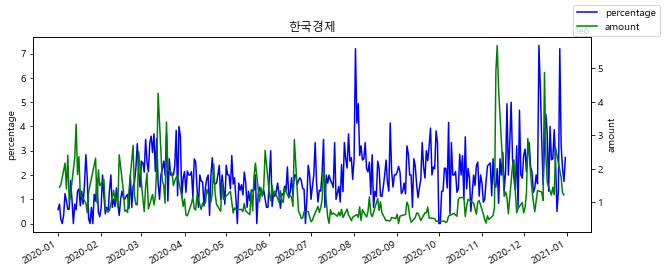

<Figure size 720x288 with 0 Axes>

In [78]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(df1["d"],df1["percentage"],color='b', label='percentage')

ax1.set_ylabel('percentage')
ax2 = ax1.twinx()
ax2.plot(new_df["date"],new_df["amt"], color='green', label='amount')
ax2.set_ylabel('amount')
fig.legend(loc="upper right")

#짝수월도나오게 코딩
plt.gca().xaxis.set_major_locator(matplotlib.dates.MonthLocator())
plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y-%m"))
plt.gcf().autofmt_xdate()
plt.title('한국경제')
fig = plt.figure(figsize=(10,4))
#plt.rcParams['figure.figsize'] = [20, 4]
plt.show()

In [24]:
#아시아경제가져오기
df2 = pd.read_csv('AK_count.csv')
df2

,d,count,count_keywords,percentage
0,2020.01.01,200,3,1.50
1,2020.01.02,800,6,0.75
2,2020.01.03,700,4,0.57
3,2020.01.04,100,0,0.00
4,2020.01.05,250,4,1.60
...,...,...,...,...
361,2020.12.27,300,12,4.00
362,2020.12.28,750,10,1.33
363,2020.12.29,800,16,2.00
364,2020.12.30,800,9,1.12


In [25]:
df2 = df2.astype({'d':'datetime64[ns]'})
df2

,d,count,count_keywords,percentage
0,2020-01-01,200,3,1.50
1,2020-01-02,800,6,0.75
2,2020-01-03,700,4,0.57
3,2020-01-04,100,0,0.00
4,2020-01-05,250,4,1.60
...,...,...,...,...
361,2020-12-27,300,12,4.00
362,2020-12-28,750,10,1.33
363,2020-12-29,800,16,2.00
364,2020-12-30,800,9,1.12


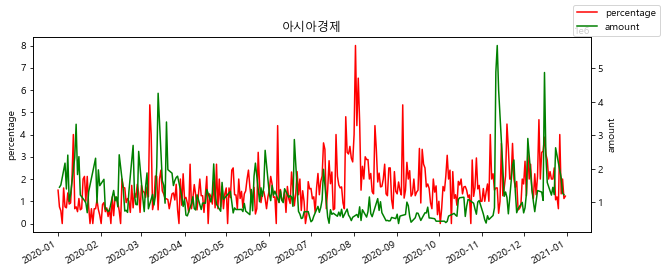

<Figure size 720x288 with 0 Axes>

In [79]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(df2["d"],df2["percentage"],color='r', label='percentage')

ax1.set_ylabel('percentage')
ax2 = ax1.twinx()
ax2.plot(new_df["date"],new_df["amt"], color='green', label='amount')
ax2.set_ylabel('amount')
fig.legend(loc="upper right")

#짝수월도나오게 코딩
plt.gca().xaxis.set_major_locator(matplotlib.dates.MonthLocator())
plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y-%m"))
plt.gcf().autofmt_xdate()
plt.title('아시아경제')
fig = plt.figure(figsize=(10,4))
#plt.rcParams['figure.figsize'] = [4, 4]
plt.show()